In [1]:
%matplotlib notebook
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from scipy.signal import argrelmax

# Ventana Rectangular
$$w_{rz}[n]=1,\quad \left|n\right| \le \frac{M-1}{2}$$
* Centrada en el origen (zero-phase)
* Longitud M (impar)

## Secuencia

In [2]:
M = 21
N = 20
n = np.arange(-N, N+1)
wr = np.zeros(len(n))
wr[np.abs(n) <= (M-1)/2] = 1
offx = 0.75
offy = 0.1
plt.figure(figsize=(8,4))
lines = plt.stem(n, wr, linefmt='k-', markerfmt='ko', basefmt='k-')
lines[2].set_xdata([n[0]-1, n[-1]+1])
plt.axis([np.min(n)-offx, np.max(n)+offx, np.min(wr)-offy, np.max(wr)+offy])
plt.grid(True)
plt.xlabel(r'$n$', fontsize=16)
plt.title(r'$w_{rz}[n], M=' + '{0}'.format(M) + r'$', fontsize=16)

<IPython.core.display.Javascript object>

/home/pepo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


Text(0.5, 1.0, '$w_{rz}[n], M=21$')

## Transformada de Fourier
### 1. Expresión simbólica

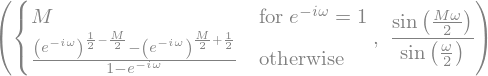

In [3]:
import sympy as sp
sp.init_printing()
omega = sp.symbols('omega', real=True)
M, n = sp.symbols('M n', integer=True)
W = sp.Sum(sp.exp(-sp.I*omega*n), (n,-(M-1)/2, (M-1)/2)).doit()
W2 = sp.sin(M*omega/2)/sp.sin(omega/2)
W, W2

### 2. Soluciones (cruces por cero)

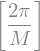

In [4]:
sp.solve(W2, omega)

### 3. Representación

In [5]:
from scipy.special import diric
def asincplot(M=3):
    o = np.linspace(-np.pi, np.pi, 512, endpoint=False)
    x = diric(o, M)
    o /= np.pi
    xticks = np.arange(-1, 1.25, 0.25)
    mX = np.abs(x)
    pX = np.unwrap(np.angle(x))
    plt.subplots(2, 2, figsize=(14, 8))
    plt.subplot(221)
    plt.plot(o, x)
    plt.axis([-1, 1, -0.4, 1.1])
    plt.xticks(xticks)
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)
    plt.grid(True)
    plt.title(r'$W_{rz}(\omega)$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel('Amplitud')
    plt.subplot(222)
    plt.plot(o, mX)
    plt.axis([-1, 1, -0.4, 1.1])
    plt.xticks(xticks)
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)
    plt.grid(True)
    plt.title(r'$|W_{rz}(\omega)|$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel('Amplitud')
    plt.subplot(223)
    plt.plot(o, 20*np.log10(mX))
    plt.axis([-1, 1, -40, 3])
    plt.xticks(xticks)
    plt.axhline(-37.5, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)
    maxidx = argrelmax(mX, mode='wrap')
    maxW = mX[maxidx]
    maxW[np.argmax(maxW)] = 0
    at1 = 20*np.log10(np.max(maxW))
    plt.axhline(at1, color='k', linewidth=1.5, dashes=(4,4))
    plt.text(0.75, at1 + 1, '{0:.1f} dB'.format(at1))
    plt.grid(True)
    plt.title(r'$|W_{rz}(\omega)|$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel(r'Magnitud (dB)')
    plt.subplot(224)
    plt.plot(o, pX)
    plt.axis([-1, 1, -0.5, 3.5])
    plt.xticks(xticks)
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(0, color='k', linewidth=1)
    plt.grid(True)
    plt.title(r'$\angle W_{rz}(\omega)$', fontsize=16, loc='left')
    plt.xlabel(r'$\omega/\pi\,(\rm{rad})$', fontsize=16, labelpad=-4)
    plt.ylabel('Fase (rad)')
interact(asincplot, M=(3, 50, 2))

interactive(children=(IntSlider(value=3, description='M', max=50, min=3, step=2), Output()), _dom_classes=('wi…

<function __main__.asincplot(M=3)>